# Part 3: Computer Vision

Set up GPU enviornment using this guide: https://saturncloud.io/blog/how-to-run-jupyter-notebook-on-gpus/

# Imports

In [25]:
from torchvision import models # Pre-trained models
from torchvision import transforms # Image pre-processing
import torch
import torchvision
from PIL import Image # Import Pillow
from torchvision.models import ResNet152_Weights
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms as T

%matplotlib inline


Checking GPU is being used

In [2]:
torch.cuda.is_available()

True

In [3]:
# Model (resnet152)
resnet = models.resnet152(weights=ResNet152_Weights.IMAGENET1K_V2)

model = fasterrcnn_resnet50_fpn(pretrained=True)

C:\Users\adam\anaconda3\envs\gpu_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\adam\anaconda3\envs\gpu_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Image Pre-processing

Sources used:
- https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models
- https://youtu.be/PPpKlPYL95c?si=FrparMIVvVJAXPo-

In [4]:
# Image pre-processing
transform = transforms.Compose([            #[1]: defining transformed (processed) image
 transforms.Resize(256),                    #[2] Resize image to 256x256
 transforms.CenterCrop(224),                #[3] Crop image to 224x224 about the center
 transforms.ToTensor(),                     #[4] Convert image to PyTorch Tensor data type
 transforms.Normalize(                      #[5-7] Normalize image
 mean=[0.485, 0.456, 0.406],                
 std=[0.229, 0.224, 0.225]                  
 )])

In [5]:
 # Load input image via Pillow
img = Image.open("../SimpleTestImages/Court.jpg")
img_t = transform(img)
batch_t = torch.unsqueeze(img_t,0)

In [6]:
# Pre-process image and prepare a batch to be passed through network
img_t = transform(img)
batch_t = torch.unsqueeze(img_t,0)

In [7]:
# Put model in evaluation mode
resnet.eval();
model.eval();

In [8]:
# Carry out the inference
out = resnet(batch_t)

In [9]:
# Read and store the labels from a text file containing 1000 labels
with open('../TextFileStorage/imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]

In [10]:
# Find label with max score (best prediction)
_, index = torch.max(out, 1)

In [11]:
# Calculate percent confidence
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

Resnet152:
bell cote, bell cot 22.47%


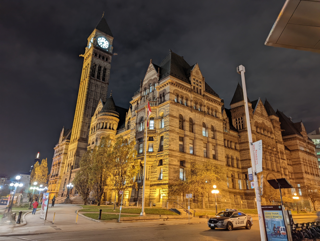

In [12]:
# Print best guess and percent confidence
print("Resnet152:")
print(f'{classes[index[0]]} {round(percentage[index[0]].item(),2)}%')

size = 320, 320
img.thumbnail(size)
display(img) # Display the image in the Jupyter Notebook

In [35]:
img = Image.open("../SimpleTestImages/Court.jpg")
transform = T.ToTensor()
img_t = transform(img)

with torch.no_grad():
    pred = model([img_t])

In [36]:
pred

[{'boxes': tensor([[1.2335e+03, 4.5777e+02, 1.3936e+03, 6.2880e+02],
          [4.0404e+02, 2.5434e+03, 4.8625e+02, 2.7359e+03],
          [2.6461e+03, 2.6778e+03, 3.2237e+03, 2.9350e+03],
          [6.5539e+02, 2.4871e+03, 7.0804e+02, 2.6381e+03],
          [1.1637e+03, 4.7825e+02, 1.2332e+03, 6.0446e+02],
          [1.1208e+03, 5.2595e+02, 1.1735e+03, 6.1862e+02],
          [1.1586e+03, 4.7738e+02, 1.2107e+03, 5.6960e+02],
          [1.1229e+03, 4.7991e+02, 1.2229e+03, 6.2248e+02],
          [2.6946e+03, 2.3503e+03, 2.7952e+03, 2.4738e+03],
          [3.6081e+02, 2.5142e+03, 4.1145e+02, 2.6651e+03],
          [1.5182e+03, 2.4237e+03, 1.5713e+03, 2.4887e+03],
          [1.1450e+03, 4.8211e+02, 1.1989e+03, 5.9101e+02],
          [4.2158e+02, 2.3149e+03, 4.8212e+02, 2.3724e+03],
          [3.5742e+02, 2.4630e+03, 4.0897e+02, 2.5960e+03],
          [1.3313e+03, 2.5674e+03, 1.4036e+03, 2.6097e+03],
          [3.8084e+03, 2.8193e+03, 4.0609e+03, 3.0510e+03],
          [2.1488e+03, 2.6538e+

In [37]:
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [38]:
scores

tensor([0.9998, 0.9980, 0.9948, 0.9907, 0.9668, 0.9404, 0.7987, 0.6263, 0.3838,
        0.3663, 0.3624, 0.3573, 0.3341, 0.3329, 0.2941, 0.2697, 0.2688, 0.2593,
        0.2210, 0.2141, 0.1893, 0.1596, 0.1513, 0.1434, 0.1281, 0.1030, 0.1026,
        0.0998, 0.0923, 0.0912, 0.0908, 0.0867, 0.0809, 0.0786, 0.0752, 0.0733,
        0.0724, 0.0671, 0.0633, 0.0632, 0.0629, 0.0612, 0.0605, 0.0578, 0.0526,
        0.0518, 0.0506, 0.0503])

In [39]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [75]:
font = cv2.FONT_HERSHEY_SIMPLEX
num = torch.argwhere(scores > 0.9).shape[0]

In [112]:
igg = cv2.imread("../SimpleTestImages/Court.jpg")
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    print(x1, y1, x2, y2)
    class_name = coco_names[labels.numpy()[i] -1]
    class_conf = str(round(scores.numpy()[i],3))
    igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 10)
    igg = cv2.putText(igg, class_name, (x1,y1-10), font, 10, (255, 255, 255), 10, cv2.LINE_AA)
    igg = cv2.putText(igg, class_conf, (x2,y2), font, 3, (255, 255, 255), 10, cv2.LINE_AA)

1233 457 1393 628
404 2543 486 2735
2646 2677 3223 2934
655 2487 708 2638
1163 478 1233 604
1120 525 1173 618


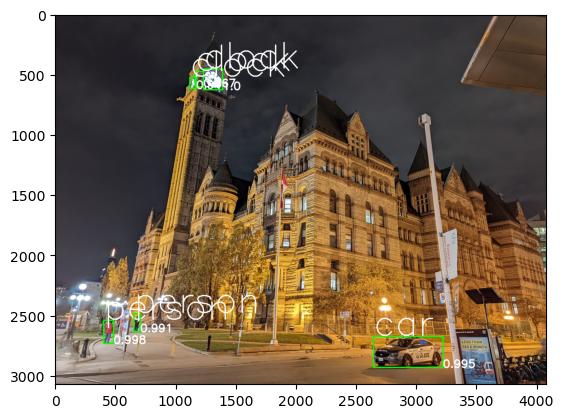

In [113]:
plt.imshow(cv2.cvtColor(igg, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()